## Imports

In [18]:
import os
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np
import pdf2image
import os
import tempfile
from tqdm.notebook import tqdm
import re
import torch
from PIL import Image
import gc
import ocr_functions
from Qariv03 import ArabicOCR

## Processing pdf

In [19]:
pdf=ocr_functions.process_pdf('3chapters_test.pdf')

Converting PDF to images (DPI=300)...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Scan_transform 

In [20]:
# Step 2: Transform each image
transformed_images = []
counter = 0
for image in pdf:
    transformed = ocr_functions.scan_transform_image(image) 
    counter += 1
    transformed_images.append(transformed)

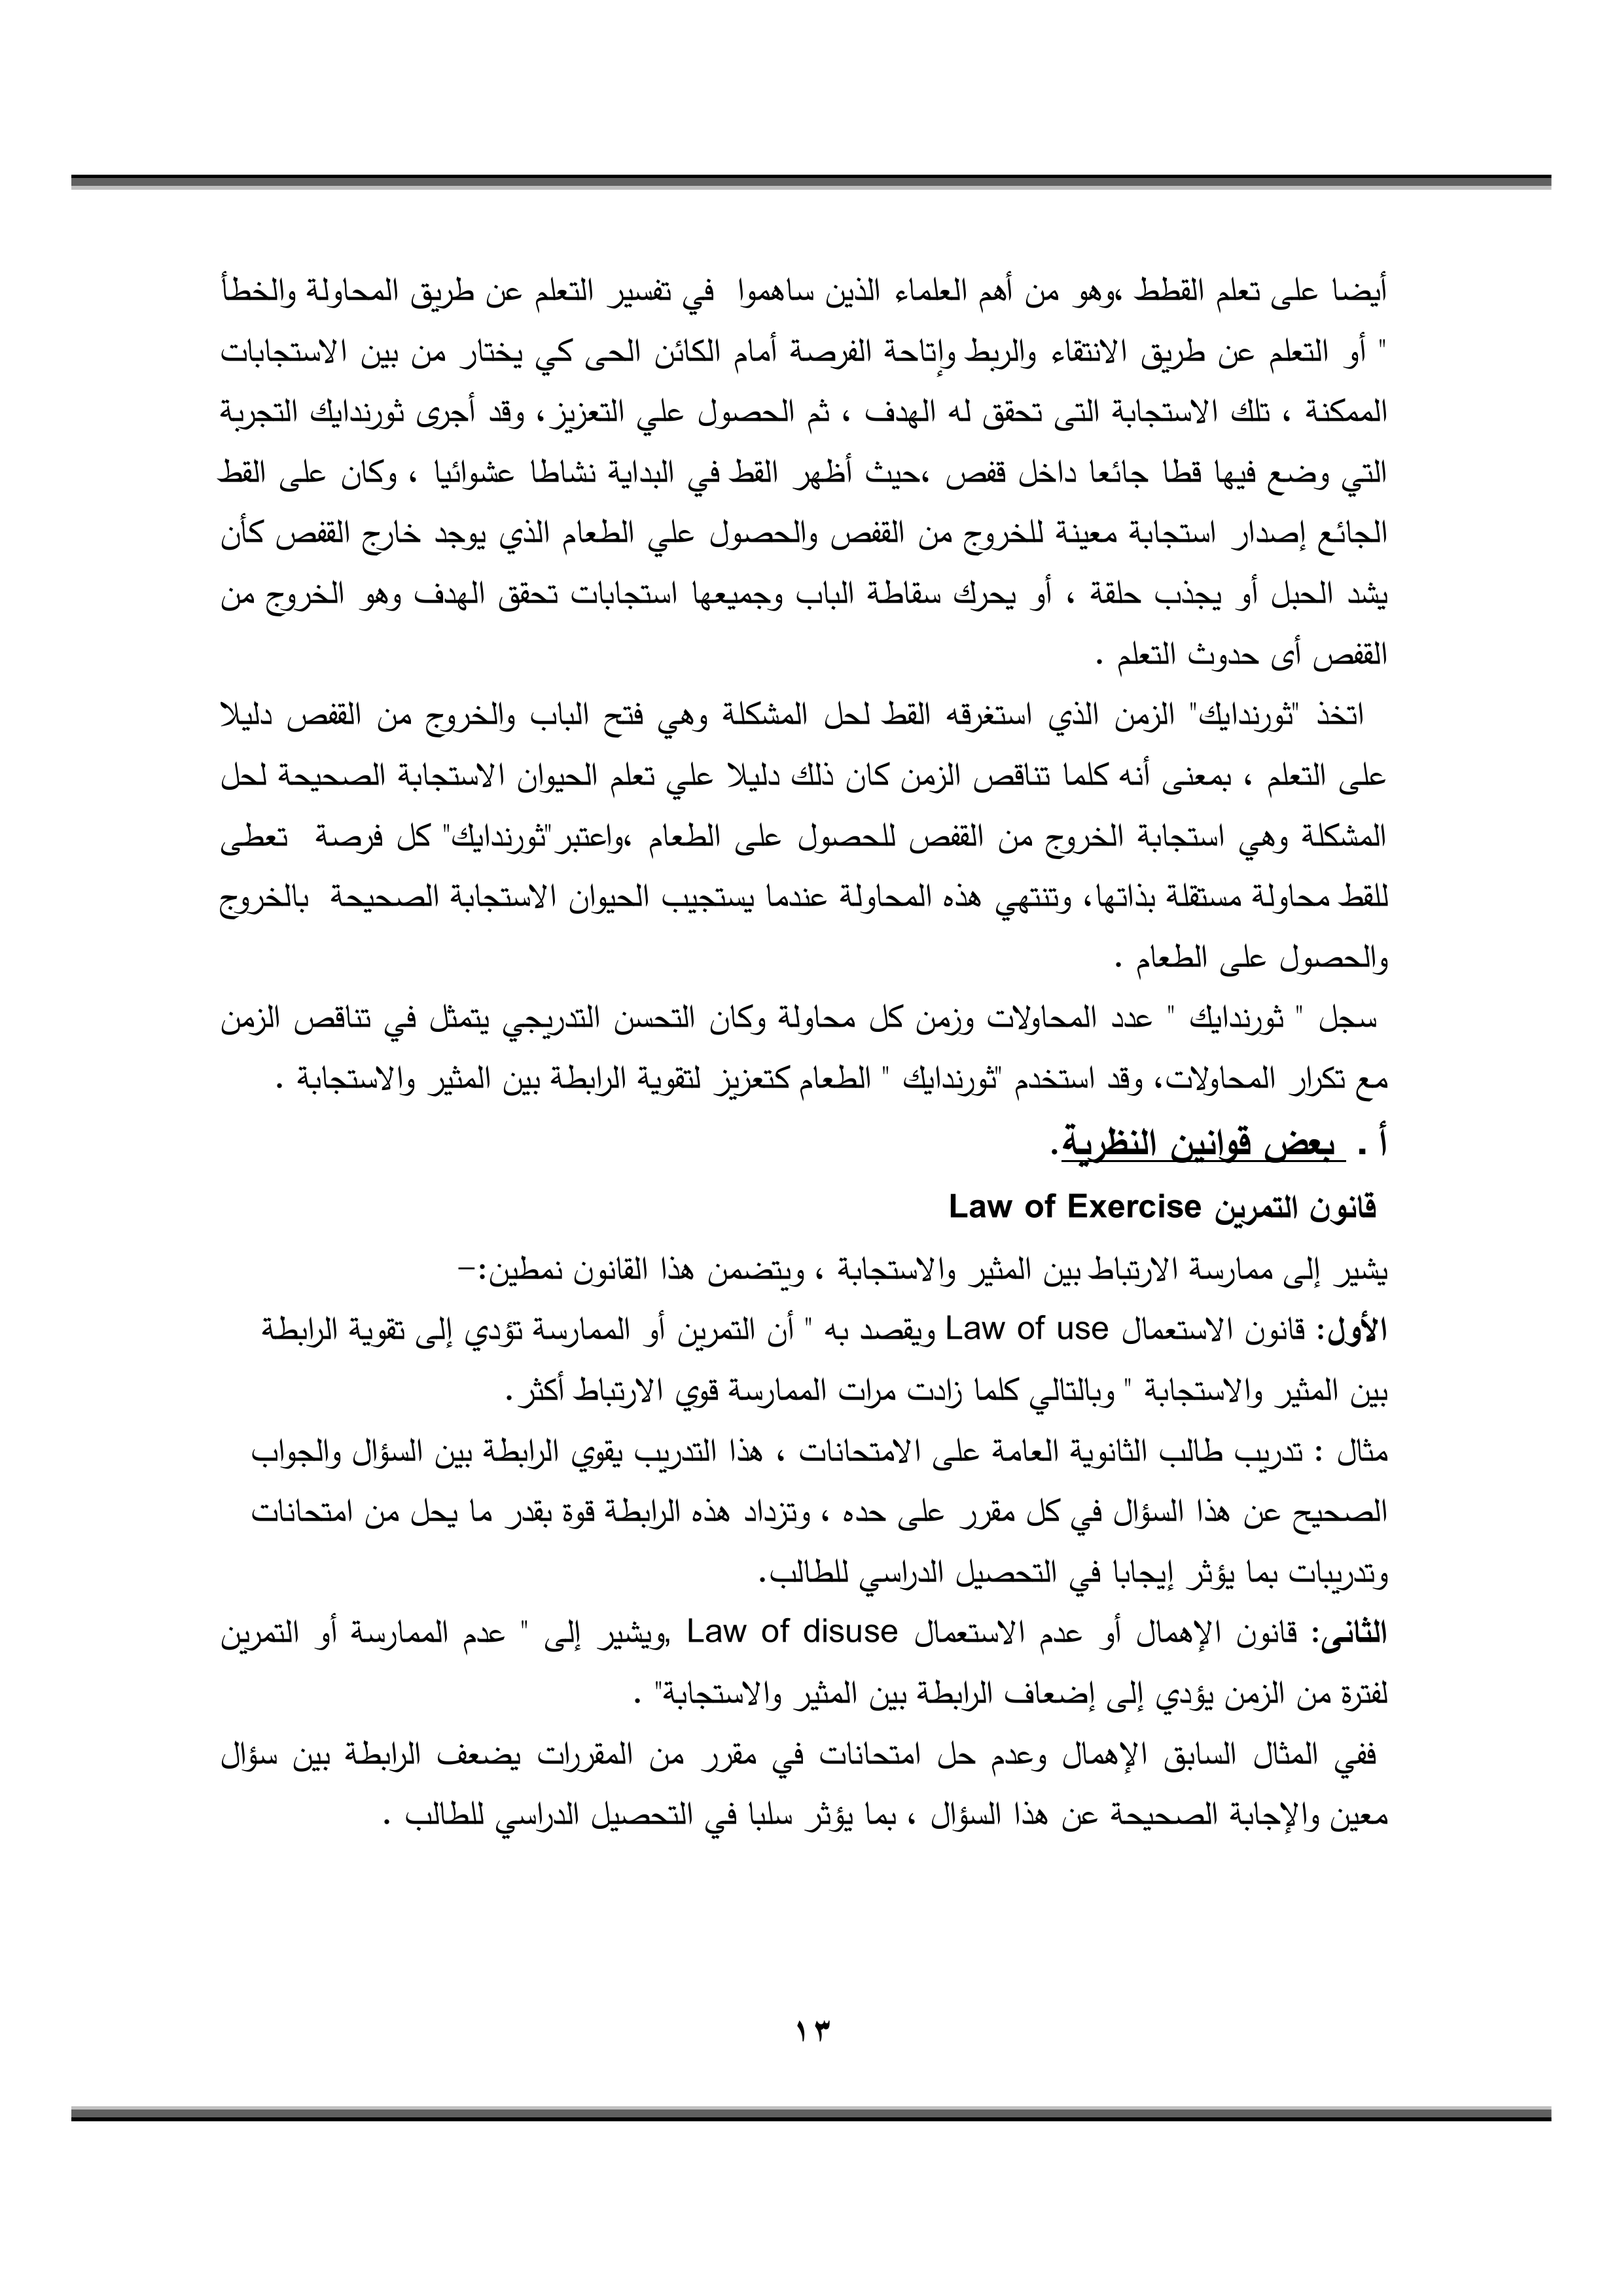

In [21]:
pdf[8]

## Qari V.0.3

In [ ]:

ocr = ArabicOCR()
texts = ocr.extract_text(pdf)


Loading model on mps...
Model loaded successfully on mps
Processing image 1/21...
Resized image from 2480x3509 to 723x1024


/Users/maryamsaad/Documents/Graduation_Proj/.venv/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.01` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/Users/maryamsaad/Documents/Graduation_Proj/.venv/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.001` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/Users/maryamsaad/Documents/Graduation_Proj/.venv/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:653: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  

Extracted 1961 characters from image 1
Processing image 2/21...
Resized image from 2480x3509 to 723x1024
Extracted 1896 characters from image 2
Processing image 3/21...
Resized image from 2480x3509 to 723x1024
Extracted 42 characters from image 3
Processing image 4/21...
Resized image from 2480x3509 to 723x1024


In [10]:
texts

'الثانويةإعراب كَلَمَةٍ المشقَةِ : قَالَ للَّتَنْبِيِّ: لَوْلاَ الشَّفَقُّ سَادَ النَّاسُ كُلُّهُمُ الجودُ يُفَقِرُ وَالْإِقْدَامُ قَتَّالُ : : مبتدا وخبره محدِّوف وجوبًا . ب مبتدا وخبره " الجود يفقر" د خبر والمبتدا محدِّوف .نوع * لا : فَى العبارة : إن الوقف لا رحمًا قطعَ ولا صديقا خسر" :نافيَةٌ للجنس عاملَة ب نافِيَةٍ للفعلسبب اقْتِرَانِ جَوَابِ الشرطِ بِالْفَاءِ: إن تُرِدَ محبَةَ الناسِ .فَلن معهم تَنَلَّ محبَتهم : مبدوء يجامد ب اسمِهِ منفيَةٌ طَلَبِهِبَيْنَ أسَلُوبِ الشرطِ فِيمَا يَلِى: م تَن تَتَقَنَ عِمَلَكَ تكَسبَ الناسِ ب اقْتِلَ الله فى سرك وعلانيتك إلَّا تَهِلَكَ د ضَعَ أولوَ هى تَرْكِيبٍ لَغَوَى تَكَونُ هِيَه مَحْتَصَّنَ :ب كَنْتَم أَوْلى عَمْزٍ طَامَحِينَ . ب أتَمَ أَوْلى العَمْزِ طَامَحُونَ . د أتَمَ أَوْلى العَمْزِ طَامَحُونَ .أ أَخُوَ الكَفَاحِ ذَوَ عَزِيمَةَ قَوِيَةَ .ب أَخُوَ الكَفَاحِ ذَا عَزِيمَةَ قَوِيَةَ .د أَخُاَ الكَفَاحِ ذَا عَزِيمَةَ قَوِيَةَ .الصَّدِرُ الْيَمِى الْوَارِدَ فَى الْبِيتِ : لْمَنَ تَطْلُبُ الدُّنْيَا إذَا لَمْ تُرِدَ بِهَا سُرَورَ مُحِبٍّ أو مسَاءَ

## Extract metrics

In [ ]:
# OCR Evaluation Metrics Notebook
# This notebook provides comprehensive evaluation of OCR performance using WER, CER, and BLEU metrics

import numpy as np
import pandas as pd
from typing import List, Dict, Tuple, Optional
import re
from pathlib import Path
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# For metrics calculation
from jiwer import wer, cer  # pip install jiwer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction  # pip install nltk
from nltk.tokenize import word_tokenize  # For tokenization
import nltk

# Download required NLTK data (run once)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

class OCRMetricsEvaluator:
    """
    A comprehensive class for evaluating OCR performance using multiple metrics.
    """
    
    def __init__(self, language: str = 'arabic'):
        """
        Initialize the evaluator.
        
        Args:
            language: Language for text processing ('arabic' or 'english')
        """
        self.language = language
        self.smoothing = SmoothingFunction().method1
        self.results = []
        
    def preprocess_text(self, text: str) -> str:
        """
        Preprocess text for consistent comparison.
        
        Args:
            text: Input text to preprocess
            
        Returns:
            Preprocessed text
        """
        if not text or text.strip() == '':
            return ''
        
        # Remove extra whitespace
        text = ' '.join(text.split())
        
        # For Arabic text processing
        if self.language == 'arabic':
            # Remove diacritics (optional - depends on your ground truth)
            # Arabic diacritics: ً ٌ ٍ َ ُ ِ ّ ْ
            diacritics = 'ًٌٍَُِّْ'
            for diacritic in diacritics:
                text = text.replace(diacritic, '')
        
        # Normalize punctuation
        text = re.sub(r'[،؟؛]', ',', text)  # Arabic punctuation to standard
        text = re.sub(r'["""]', '"', text)  # Normalize quotes
        text = re.sub(r'[''\']', "'", text)  # Normalize apostrophes
        
        # Remove extra spaces around punctuation
        text = re.sub(r'\s+([,.!?;:])', r'\1', text)
        text = re.sub(r'([,.!?;:])\s+', r'\1 ', text)
        
        return text.strip()
    
    def calculate_wer(self, reference: str, hypothesis: str) -> float:
        """
        Calculate Word Error Rate (WER).
        
        Args:
            reference: Ground truth text
            hypothesis: OCR output text
            
        Returns:
            WER score (0.0 = perfect, higher = worse)
        """
        if not reference.strip() or not hypothesis.strip():
            return 1.0 if reference.strip() != hypothesis.strip() else 0.0
        
        try:
            reference_clean = self.preprocess_text(reference)
            hypothesis_clean = self.preprocess_text(hypothesis)
            return wer(reference_clean, hypothesis_clean)
        except Exception as e:
            print(f"Error calculating WER: {e}")
            return 1.0
    
    def calculate_cer(self, reference: str, hypothesis: str) -> float:
        """
        Calculate Character Error Rate (CER).
        
        Args:
            reference: Ground truth text
            hypothesis: OCR output text
            
        Returns:
            CER score (0.0 = perfect, higher = worse)
        """
        if not reference.strip() or not hypothesis.strip():
            return 1.0 if reference.strip() != hypothesis.strip() else 0.0
        
        try:
            reference_clean = self.preprocess_text(reference)
            hypothesis_clean = self.preprocess_text(hypothesis)
            return cer(reference_clean, hypothesis_clean)
        except Exception as e:
            print(f"Error calculating CER: {e}")
            return 1.0
    
    def calculate_bleu(self, reference: str, hypothesis: str, max_n: int = 4) -> Dict[str, float]:
        """
        Calculate BLEU scores (1-gram to 4-gram).
        
        Args:
            reference: Ground truth text
            hypothesis: OCR output text
            max_n: Maximum n-gram to calculate
            
        Returns:
            Dictionary with BLEU-1, BLEU-2, BLEU-3, BLEU-4 scores
        """
        if not reference.strip() or not hypothesis.strip():
            return {f'bleu_{i}': 0.0 for i in range(1, max_n + 1)}
        
        try:
            reference_clean = self.preprocess_text(reference)
            hypothesis_clean = self.preprocess_text(hypothesis)
            
            # Tokenize based on language
            if self.language == 'arabic':
                # Simple whitespace tokenization for Arabic
                ref_tokens = reference_clean.split()
                hyp_tokens = hypothesis_clean.split()
            else:
                # Use NLTK tokenization for other languages
                ref_tokens = word_tokenize(reference_clean)
                hyp_tokens = word_tokenize(hypothesis_clean)
            
            bleu_scores = {}
            for n in range(1, max_n + 1):
                weights = tuple([1/n] * n + [0] * (4-n))
                score = sentence_bleu(
                    [ref_tokens], 
                    hyp_tokens, 
                    weights=weights,
                    smoothing_function=self.smoothing
                )
                bleu_scores[f'bleu_{n}'] = score
            
            return bleu_scores
            
        except Exception as e:
            print(f"Error calculating BLEU: {e}")
            return {f'bleu_{i}': 0.0 for i in range(1, max_n + 1)}
    
    def evaluate_single_page(self, 
                           reference: str, 
                           hypothesis: str, 
                           page_id: str = None) -> Dict:
        """
        Evaluate a single page with all metrics.
        
        Args:
            reference: Ground truth text
            hypothesis: OCR output text
            page_id: Identifier for the page
            
        Returns:
            Dictionary with all metrics
        """
        # Calculate all metrics
        wer_score = self.calculate_wer(reference, hypothesis)
        cer_score = self.calculate_cer(reference, hypothesis)
        bleu_scores = self.calculate_bleu(reference, hypothesis)
        
        # Additional statistics
        ref_words = len(self.preprocess_text(reference).split())
        hyp_words = len(self.preprocess_text(hypothesis).split())
        ref_chars = len(self.preprocess_text(reference))
        hyp_chars = len(self.preprocess_text(hypothesis))
        
        result = {
            'page_id': page_id or f"page_{len(self.results) + 1}",
            'wer': wer_score,
            'cer': cer_score,
            'accuracy_word': 1 - wer_score,  # Word accuracy
            'accuracy_char': 1 - cer_score,  # Character accuracy
            'reference_words': ref_words,
            'hypothesis_words': hyp_words,
            'reference_chars': ref_chars,
            'hypothesis_chars': hyp_chars,
            'word_difference': abs(ref_words - hyp_words),
            'char_difference': abs(ref_chars - hyp_chars),
            **bleu_scores
        }
        
        self.results.append(result)
        return result
    
    def evaluate_batch(self, 
                      references: List[str], 
                      hypotheses: List[str],
                      page_ids: Optional[List[str]] = None) -> List[Dict]:
        """
        Evaluate multiple pages in batch.
        
        Args:
            references: List of ground truth texts
            hypotheses: List of OCR output texts
            page_ids: Optional list of page identifiers
            
        Returns:
            List of evaluation results
        """
        if len(references) != len(hypotheses):
            raise ValueError("References and hypotheses must have the same length")
        
        if page_ids and len(page_ids) != len(references):
            raise ValueError("Page IDs must have the same length as references")
        
        batch_results = []
        
        for i, (ref, hyp) in enumerate(tqdm(zip(references, hypotheses), 
                                          desc="Evaluating pages", 
                                          total=len(references))):
            page_id = page_ids[i] if page_ids else f"page_{i+1}"
            result = self.evaluate_single_page(ref, hyp, page_id)
            batch_results.append(result)
        
        return batch_results
    
    def get_summary_statistics(self) -> Dict:
        """
        Calculate summary statistics across all evaluated pages.
        
        Returns:
            Dictionary with summary statistics
        """
        if not self.results:
            return {}
        
        df = pd.DataFrame(self.results)
        
        numeric_columns = ['wer', 'cer', 'accuracy_word', 'accuracy_char', 
                          'bleu_1', 'bleu_2', 'bleu_3', 'bleu_4']
        
        summary = {
            'total_pages': len(self.results),
            'mean_wer': df['wer'].mean(),
            'std_wer': df['wer'].std(),
            'mean_cer': df['cer'].mean(),
            'std_cer': df['cer'].std(),
            'mean_word_accuracy': df['accuracy_word'].mean(),
            'mean_char_accuracy': df['accuracy_char'].mean(),
            'mean_bleu_1': df['bleu_1'].mean(),
            'mean_bleu_2': df['bleu_2'].mean(),
            'mean_bleu_3': df['bleu_3'].mean(),
            'mean_bleu_4': df['bleu_4'].mean(),
            'best_page_wer': df.loc[df['wer'].idxmin(), 'page_id'],
            'worst_page_wer': df.loc[df['wer'].idxmax(), 'page_id'],
            'best_page_cer': df.loc[df['cer'].idxmin(), 'page_id'],
            'worst_page_cer': df.loc[df['cer'].idxmax(), 'page_id'],
        }
        
        return summary
    
    def plot_metrics(self, figsize: Tuple[int, int] = (15, 10), save_path: str = None):
        """
        Create comprehensive plots of the evaluation metrics.
        
        Args:
            figsize: Figure size for plots
            save_path: Optional path to save the plots
        """
        if not self.results:
            print("No results to plot. Run evaluation first.")
            return
        
        df = pd.DataFrame(self.results)
        
        fig, axes = plt.subplots(2, 3, figsize=figsize)
        fig.suptitle('OCR Performance Metrics', fontsize=16, fontweight='bold')
        
        # WER distribution
        axes[0, 0].hist(df['wer'], bins=20, alpha=0.7, color='red', edgecolor='black')
        axes[0, 0].set_title('Word Error Rate (WER) Distribution')
        axes[0, 0].set_xlabel('WER')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].axvline(df['wer'].mean(), color='red', linestyle='--', 
                          label=f'Mean: {df["wer"].mean():.3f}')
        axes[0, 0].legend()
        
        # CER distribution
        axes[0, 1].hist(df['cer'], bins=20, alpha=0.7, color='blue', edgecolor='black')
        axes[0, 1].set_title('Character Error Rate (CER) Distribution')
        axes[0, 1].set_xlabel('CER')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].axvline(df['cer'].mean(), color='blue', linestyle='--', 
                          label=f'Mean: {df["cer"].mean():.3f}')
        axes[0, 1].legend()
        
        # BLEU scores
        bleu_cols = ['bleu_1', 'bleu_2', 'bleu_3', 'bleu_4']
        bleu_means = [df[col].mean() for col in bleu_cols]
        axes[0, 2].bar(range(1, 5), bleu_means, alpha=0.7, color='green', edgecolor='black')
        axes[0, 2].set_title('Mean BLEU Scores')
        axes[0, 2].set_xlabel('N-gram')
        axes[0, 2].set_ylabel('BLEU Score')
        axes[0, 2].set_xticks(range(1, 5))
        axes[0, 2].set_xticklabels(['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4'])
        
        # WER vs CER scatter
        axes[1, 0].scatter(df['wer'], df['cer'], alpha=0.6, color='purple')
        axes[1, 0].set_title('WER vs CER Correlation')
        axes[1, 0].set_xlabel('WER')
        axes[1, 0].set_ylabel('CER')
        
        # Page-wise performance
        page_numbers = range(1, len(df) + 1)
        axes[1, 1].plot(page_numbers, df['wer'], 'o-', label='WER', alpha=0.7)
        axes[1, 1].plot(page_numbers, df['cer'], 's-', label='CER', alpha=0.7)
        axes[1, 1].set_title('Page-wise Performance')
        axes[1, 1].set_xlabel('Page Number')
        axes[1, 1].set_ylabel('Error Rate')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        # Accuracy comparison
        accuracies = [df['accuracy_word'].mean(), df['accuracy_char'].mean()]
        accuracy_labels = ['Word Accuracy', 'Character Accuracy']
        colors = ['orange', 'cyan']
        bars = axes[1, 2].bar(accuracy_labels, accuracies, color=colors, alpha=0.7, edgecolor='black')
        axes[1, 2].set_title('Mean Accuracy Scores')
        axes[1, 2].set_ylabel('Accuracy')
        axes[1, 2].set_ylim(0, 1)
        
        # Add value labels on bars
        for bar, acc in zip(bars, accuracies):
            height = bar.get_height()
            axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{acc:.3f}', ha='center', va='bottom')
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Plots saved to: {save_path}")
        
        plt.show()
    
    def export_results(self, filepath: str, format: str = 'csv'):
        """
        Export evaluation results to file.
        
        Args:
            filepath: Output file path
            format: Export format ('csv', 'json', 'excel')
        """
        if not self.results:
            print("No results to export. Run evaluation first.")
            return
        
        df = pd.DataFrame(self.results)
        
        if format.lower() == 'csv':
            df.to_csv(filepath, index=False, encoding='utf-8')
        elif format.lower() == 'json':
            with open(filepath, 'w', encoding='utf-8') as f:
                json.dump(self.results, f, ensure_ascii=False, indent=2)
        elif format.lower() == 'excel':
            df.to_excel(filepath, index=False)
        else:
            raise ValueError("Format must be 'csv', 'json', or 'excel'")
        
        print(f"Results exported to: {filepath}")
    
    def clear_results(self):
        """Clear all stored results."""
        self.results = []
        print("Results cleared.")

# Example usage and testing functions

def load_ground_truth(file_path: str) -> List[str]:
    """
    Load ground truth texts from file.
    
    Args:
        file_path: Path to ground truth file
        
    Returns:
        List of ground truth texts
    """
    path = Path(file_path)
    
    if path.suffix.lower() == '.json':
        with open(path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            if isinstance(data, list):
                return data
            elif isinstance(data, dict) and 'results' in data:
                return [item.get('text', '') for item in data['results']]
    
    elif path.suffix.lower() == '.txt':
        with open(path, 'r', encoding='utf-8') as f:
            content = f.read()
            # Split by page separators or double newlines
            pages = re.split(r'={20,}|--- Page \d+ ---|^Page \d+', content, flags=re.MULTILINE)
            return [page.strip() for page in pages if page.strip()]
    
    elif path.suffix.lower() == '.csv':
        df = pd.read_csv(path)
        if 'text' in df.columns:
            return df['text'].tolist()
        elif 'ground_truth' in df.columns:
            return df['ground_truth'].tolist()
    
    raise ValueError(f"Unsupported file format: {path.suffix}")

def demo_evaluation():
    """
    Demonstrate OCR evaluation with sample data.
    """
    print("🔍 OCR Evaluation Demo")
    print("=" * 50)
    
    # Sample data (replace with your actual data)
    ground_truth = [
        "هذا نص عربي للاختبار والتقييم",
        "النص الثاني يحتوي على كلمات أكثر للتحليل الدقيق",
        "الصفحة الثالثة تختبر دقة التعرف على النصوص"
    ]
    
    ocr_output = [
        "هذا نص عربي للاختبار والتقيم",  # missing one character
        "النص الثاني يحتوي على كلمات أكثر للتحليل الدفيق",  # one word error
        "الصفحة الثالثة تختبر دقة التعرف على النصوص"  # perfect match
    ]
    
    # Initialize evaluator
    evaluator = OCRMetricsEvaluator(language='arabic')
    
    # Evaluate batch
    results = evaluator.evaluate_batch(ground_truth, ocr_output)
    
    # Print results
    print("\n📊 Page-wise Results:")
    for i, result in enumerate(results):
        print(f"\nPage {i+1}:")
        print(f"  WER: {result['wer']:.3f}")
        print(f"  CER: {result['cer']:.3f}")
        print(f"  Word Accuracy: {result['accuracy_word']:.3f}")
        print(f"  Character Accuracy: {result['accuracy_char']:.3f}")
        print(f"  BLEU-1: {result['bleu_1']:.3f}")
        print(f"  BLEU-4: {result['bleu_4']:.3f}")
    
    # Summary statistics
    summary = evaluator.get_summary_statistics()
    print("\n📈 Summary Statistics:")
    print(f"  Mean WER: {summary['mean_wer']:.3f} ± {summary['std_wer']:.3f}")
    print(f"  Mean CER: {summary['mean_cer']:.3f} ± {summary['std_cer']:.3f}")
    print(f"  Mean Word Accuracy: {summary['mean_word_accuracy']:.3f}")
    print(f"  Mean BLEU-4: {summary['mean_bleu_4']:.3f}")
    
    # Create plots
    evaluator.plot_metrics(figsize=(12, 8))
    
    return evaluator

# Load ground truth
ground_truth = load_ground_truth('3chapters_test_GT.json')

# Evaluate
evaluator = OCRMetricsEvaluator(language='arabic')
results = evaluator.evaluate_batch(ground_truth, texts)

# Get summary
summary = evaluator.get_summary_statistics()
print(f"Mean WER: {summary['mean_wer']:.3f}")
print(f"Mean CER: {summary['mean_cer']:.3f}")

# Create visualizations
evaluator.plot_metrics()

# Export results
evaluator.export_results('ocr_evaluation_results.csv')